In [2]:
!git clone https://github.com/rwightman/posenet-pytorch.git
%cd posenet-pytorch

fatal: destination path 'posenet-pytorch' already exists and is not an empty directory.
/content/posenet-pytorch


In [3]:
import os
import cv2
import torch
import posenet
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
!pip install tfjs-graph-converter

In [5]:
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *

net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

Cannot find models file ./_models/mobilenet_v1_101.pth, converting from tfjs...
Weights for checkpoint mobilenet_v1_101 are not downloaded. Downloading to /tmp/_posenet_weights ...


In [7]:
def posenet_model(file):
    input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)
    with torch.no_grad():
        input_image = torch.Tensor(input_image).cuda()

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = net(input_image)

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
            heatmaps_result.squeeze(0),
            offsets_result.squeeze(0),
            displacement_fwd_result.squeeze(0),
            displacement_bwd_result.squeeze(0),
            output_stride=output_stride,
            max_pose_detections=10,
            min_pose_score=0.25)

        #Find keypoints on the image
        image = plt.imread(file)
        poses = []

        for pi in range(len(pose_scores)):
            if pose_scores[pi] != 0.:
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))
                keypoints = keypoint_coords.astype(np.int32)
                print(keypoints[pi])
                poses.append(keypoints[pi])

        #Show keypoints on the image
        img = plt.imread(file)
        i=0
        pose = poses[0]
        plt.imshow(img)
        for y,x in pose:
            plt.plot(x, y, 'w.')
            plt.text(x, y, str(i), color='r', fontsize=10)
            i+=1
        plt.show()

In [23]:
file = '/content/yoga-pose.jpeg'
file2 = '/content/yoga-pose-2.jpeg'
file3 = '/content/yoga-pose-3.jpeg'

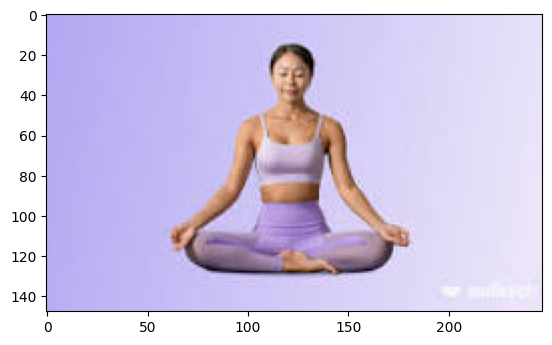

In [21]:
import matplotlib.pyplot as plt
img = plt.imread(file)
plt.imshow(img)
plt.show()

Pose #0, score = 0.726355
[[ 35 119]
 [ 31 122]
 [ 31 115]
 [ 33 126]
 [ 31 108]
 [ 52 133]
 [ 55 101]
 [ 84 143]
 [ 82  87]
 [104 151]
 [104  87]
 [101 126]
 [101 105]
 [115 129]
 [110  77]
 [126 119]
 [122  77]]


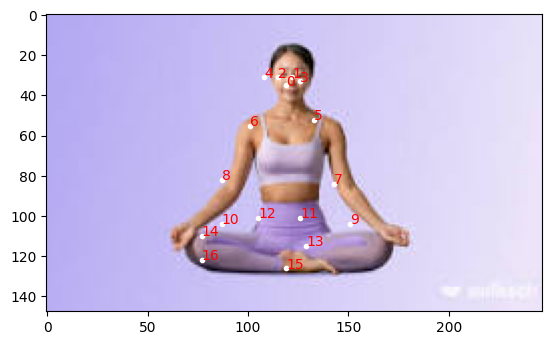

In [22]:
posenet_model(file)

Pose #0, score = 0.572320
[[ 94 112]
 [ 90 105]
 [ 91 105]
 [ 90 109]
 [ 96 114]
 [ 95 129]
 [102 116]
 [ 84 124]
 [ 87 119]
 [ 50 119]
 [ 51 118]
 [149 152]
 [152 130]
 [158 179]
 [173 108]
 [186 168]
 [183  86]]


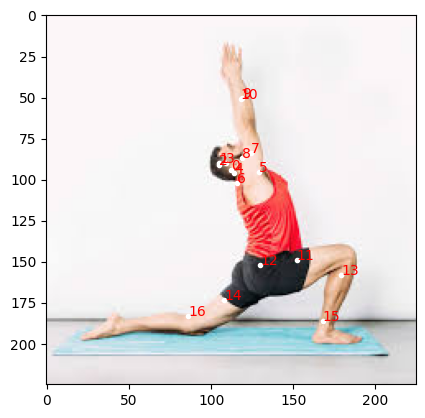

In [25]:
posenet_model(file2)

Pose #0, score = 0.278695
[[128 116]
 [123 118]
 [125 121]
 [122 116]
 [118 114]
 [116  96]
 [119 111]
 [128  92]
 [128 117]
 [126 104]
 [131 121]
 [141  77]
 [138  91]
 [164  82]
 [149 107]
 [193  81]
 [168 107]]


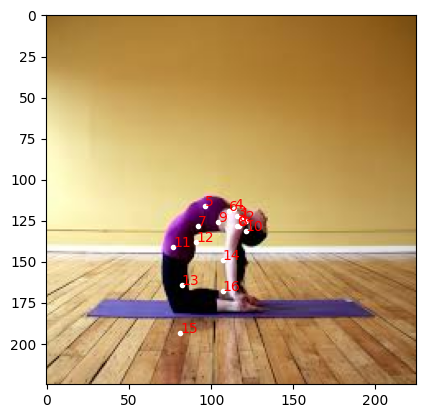

In [26]:
posenet_model(file3)